## Exploratory Data Analysis

#### Extract and load the dataset

In [3]:
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data function from your custom module
from dataProcessing import load_data 


# Define paths
zip_file_path = '../Data/raw_analyst_ratings.csv.zip'  # Path to the .zip file
extracted_folder_path = '../Data'  # Path where the files will be extracted

In [4]:
# Load the dataset to the dataframe
df = load_data(zip_file_path, 'raw_analyst_ratings.csv')

In [5]:
# explore the the first 5 rows
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [6]:
# Check the size of the dataset
df.shape

(1407328, 5)

In [7]:
# checking missing values
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [8]:
# check the data types
df.dtypes

headline                  object
url                       object
publisher                 object
date         datetime64[ns, UTC]
stock                     object
dtype: object

In [9]:
# check the uniqueness of the data
# Duplicate rows
print("\nDuplicated rows:")
df[df.duplicated()].reset_index()


Duplicated rows:


,index,headline,url,publisher,date,stock
0,562357,"Top Performing Industries For July 1, 2015",https://www.benzinga.com/news/15/07/5642290/to...,Lisa Levin,2015-07-01 00:00:00+00:00,GME


In [17]:
# drop duplicated rows
df.drop_duplicates().reset_index(inplace=True)

#### Descriptive Statistics

In [10]:
# Use EDA Analysis
import descriptiveAnalysis as da

# Descriptive statistics
print("Headline Length Statistics:")
print(da.headline_length_stats(df))

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


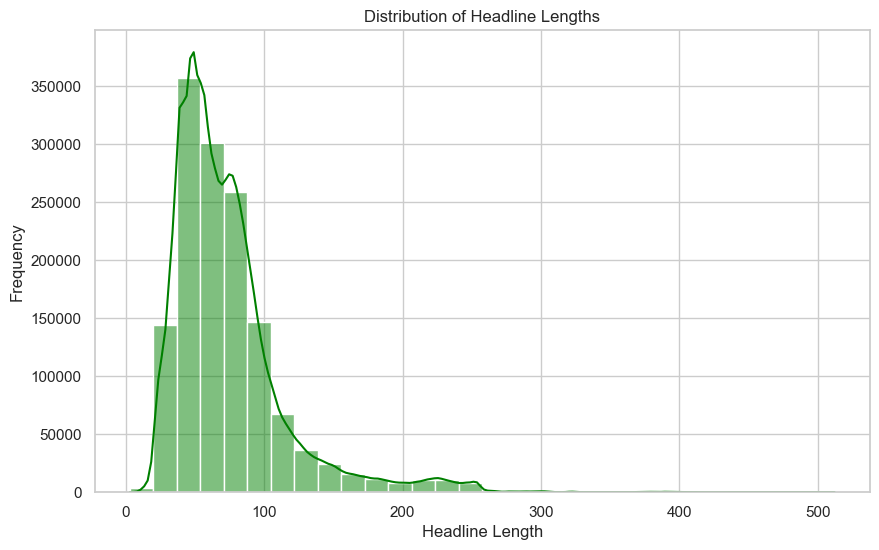

In [41]:
# Plot the distribution of headline lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    df['headline_length'], 
    bins=30, 
    kde=True, 
    color='green',  # Color for the histogram
    line_kws={'color': 'red'}  # Color for the KDE line
)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


##### Summary of the Distribution Plot:

The descriptive statistics and distribution plot reveal a pronounced right skew in the data. This suggests that while most headlines tend to be relatively short, there is a smaller subset that is considerably longer.

The distribution's peak occurs within the range of 50-70 characters, indicating that this length is the most prevalent among the headlines.

In conclusion, the distribution of headline lengths is characterized by a right skew, with a peak around 50-70 characters and a long tail representing the longer headlines. Most headlines are concise, but a few notably exceed this length.

#### Get Active Publishers

In [11]:
print("Top Publishers:")
publisher_counts = da.articles_per_publisher(df).reset_index(name="number_of_articles")
top_publisher = publisher_counts.head(10)
top_publisher

Top Publishers:


,publisher,number_of_articles
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


In [28]:
print(top_publisher.columns)

Index(['publisher', 'number_of_articles'], dtype='object')


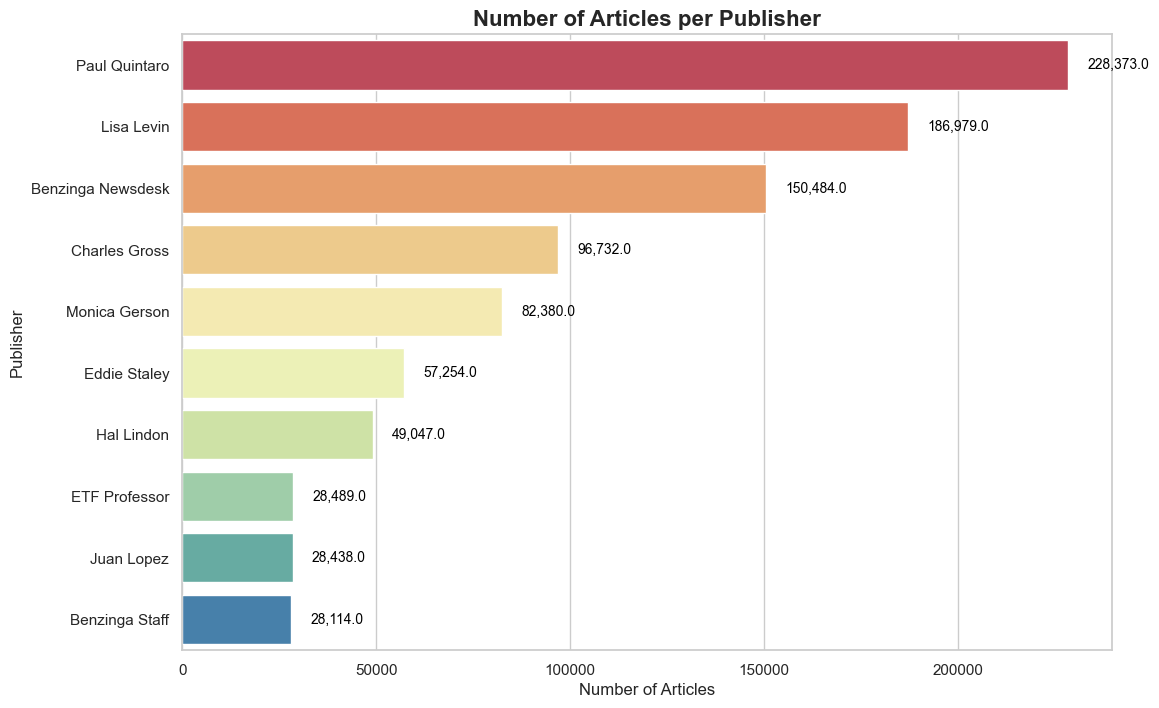

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with distinct colors for each publisher
custom_palette = sns.color_palette("Spectral", n_colors=len(top_publisher))

# Plot the number of articles per publisher
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x='number_of_articles', y='publisher', 
                   data=top_publisher, 
                   palette=custom_palette,  # Use the custom palette
                   hue='publisher',  # Assign the 'publisher' variable to hue
                   legend=False,     # Disable the legend
                   ax=ax)

# Add exact numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()  # Get the bar width (number of articles)
    label = f'{width:,}'  # Format the number with commas
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, label,  # Add the label
            ha='left', va='center', color='black', fontsize=10)

# Set titles and labels
plt.title('Number of Articles per Publisher', fontsize=16, fontweight='bold')
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('Publisher', fontsize=12)

# Display the plot
plt.show()

##### Summary of Most Active Publishers

1. Paul Quintaro is the most active publisher with 228,373 articles.

2. Lisa Levin follows with 186,978 articles.

3. Benzinga Newsdesk has 150,484 articles, making it the third most active.

4. Charles Gross and Monica Gerson are also highly active, with 96,732 and 82,380 articles, respectively.

5. Eddie Staley , Hal Lindon, ETF Professor, Juan Lopez, and Benzinga Staff are notable contributors, each publishing between 28,114 and 57,254 articles.

#### Daily Article Breakdown

In [46]:
# Daily Article Breakdown
articles_by_day = da.articles_by_day_of_week(df).reset_index(name='number_of_articles')
articles_by_day

,day_of_week,number_of_articles
0,Thursday,302619
1,Wednesday,300922
2,Tuesday,296505
3,Monday,265139
4,Friday,217918
5,Sunday,16466
6,Saturday,7759


##### Summary of Article Publishing by Day of the Week

The data reveals a distinct pattern in article publishing throughout the week. Thursday leads with the highest number of articles published, totaling 302,619 entries, followed closely by Wednesday with 300,922 articles and Tuesday with 296,505. Monday also shows a significant volume, with 265,139 articles.

In contrast, publishing activity decreases notably on Fridays, with 217,918 articles, and drops sharply over the weekend, with only 16,466 articles on Sunday and 7,759 on Saturday. This indicates a strong preference for mid-week publishing, with the weekend exhibiting substantially lower activity.

#### Analyze unique emails

In [47]:
# identify unique emails
unique_domains = da.identify_unique_domains(df)
unique_domains.reset_index(drop=True)

,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


#### Text Analysis(Sentiment analysis & Topic Modeling)

In [12]:
# Import the module
from sentimentAnalysis import SentimentAnalyzer as sa

# Perform sentiment analysis on headline
sentiment_df = sa.analyze_sentiment(df['headline'])

# Apply sentiment categories (Positive, Neutral, Negative)
sentiment_df = sa.apply_sentiment_categories(sentiment_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amenz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amenz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amenz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
# make the date as index and add stock column at the end
sentiment_df['Date'] = df['date'].dt.date
sentiment_df['stock'] = df['stock']
sentiment_df.set_index('Date', inplace=True)

In [56]:
# Display results
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral
2,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive


In [57]:
empty_headlines = sentiment_df[sentiment_df['headline'] == '']
print(f"Number of empty headlines: {len(empty_headlines)}")    

Number of empty headlines: 0


In [58]:
missing_after_sentiment = sentiment_df[sentiment_df['headline'].isna()]
print(f"Number of missing headlines after sentiment analysis: {len(missing_after_sentiment)}")

Number of missing headlines after sentiment analysis: 6509


In [59]:
# Find rows with NaN in cleaned_headline
# Check the data types in the 'headline' column
print(sentiment_df['headline'].apply(type).value_counts())

headline
<class 'str'>      1407328
<class 'float'>       6509
Name: count, dtype: int64


In [60]:
# Drop rows where the 'headline' column has float values
sentiment_df = sentiment_df[sentiment_df['headline'].apply(lambda x: not isinstance(x, float))]

#### Sentiment Distribution of Headlines

Sentiment
Neutral     744222
Positive    439803
Negative    223303
Name: count, dtype: int64


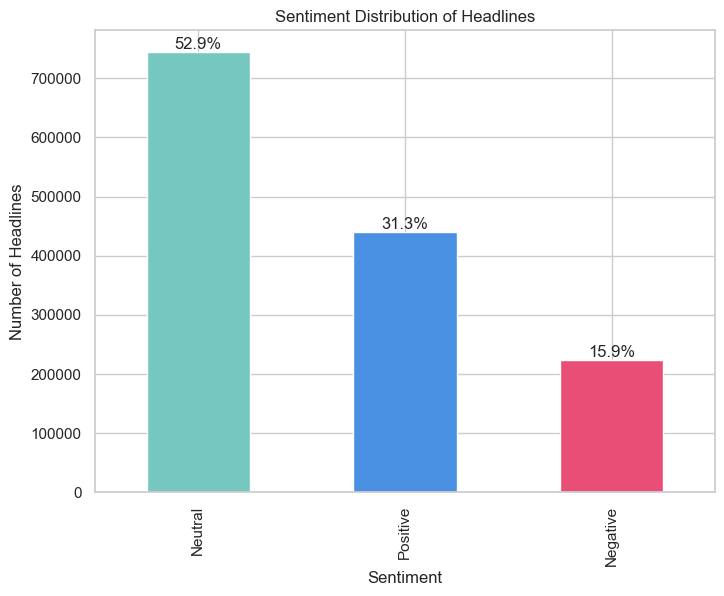

In [62]:
# Summary of sentiment distribution
sentiment_distribution = sentiment_df['Sentiment'].value_counts()
print(sentiment_distribution)

total = sentiment_distribution.sum()  # Calculate the total number of headlines
percentages = (sentiment_distribution / total) * 100  # Calculate percentages

# Optional: Plot the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Define custom colors for each sentiment
colors = ['#76c7c0', '#4a90e2', '#e94e77']  # Custom colors for Neutral, Positive, Negative

# Plot the bar chart with custom colors
bars = sentiment_distribution.plot(kind='bar', color=colors)

# Add percentage annotations on top of each bar
for i, bar in enumerate(bars.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the percentage and format it
    percentage_text = f'{percentages.iloc[i]:.1f}%'  # Use .iloc to avoid FutureWarning
    # Position the text at the end of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, percentage_text, 
             ha='center', va='bottom', fontsize=12)

# Set titles and labels
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Display the plot
plt.show()

The analysis reveals that a majority of the headlines (52.7%) maintain a neutral tone, suggesting that much of the financial news is presented factually or in a balanced manner without a strong positive or negative bias. A notable portion (31.4%) of the headlines expresses a positive sentiment, indicating an optimistic outlook in the news. Conversely, a smaller percentage (15.9%) of the headlines is negative, highlighting that instances of pessimism or unfavorable news are less common.

Overall, the sentiment distribution indicates that financial news is predominantly neutral or positive, with fewer headlines reflecting negativity. This trend may reflect the media's emphasis on positive financial developments or the prevailing market conditions during the analyzed period.

### Identify common keywords and phrases

Steps to identify common kewords and phrases Includes the follwoing 

##### Text Preprocessing:

&#10003; Clean and prepare the text data by removing stopwords, punctuation, and other noise.

##### Tokenization:

&#10003; Break down the text into individual words or phrases.

##### Frequency Analysis:

&#10003; Calculate the frequency of each word or phrase to identify the most common ones.

In [63]:
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral
2,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive


In [64]:
sentiment_df.dtypes

headline      object
neg          float64
neu          float64
pos          float64
compound     float64
Sentiment     object
dtype: object

In [67]:
sentiment_df.isnull().sum()

headline        0
neg          6509
neu          6509
pos          6509
compound     6509
Sentiment       0
dtype: int64

Most common keywords:
vs: 162147
stocks: 161868
q: 157878
est: 140606
eps: 128929
shares: 114209
reports: 108707
update: 91680
market: 90880
earnings: 87185
sales: 79526
top: 78678
pt: 73054
week: 67669
announces: 66529
price: 64232
buy: 64060
downgrades: 61942
trading: 61158
benzingas: 57985


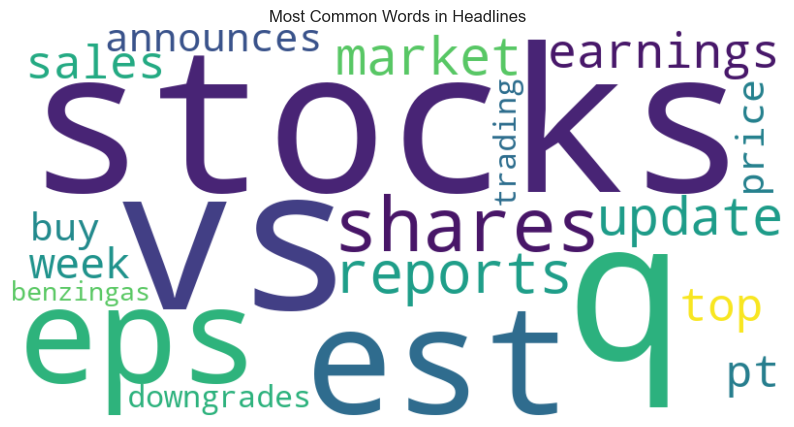

In [68]:
# Analyze the most common keywords
sa.perform_nlp_analysis(sentiment_df['headline'])

#### Time Series Analysis

##### Analzye annual or quartley trends

d:\KAIM\Financial-News-Analysis\scripts\publicationAnalysis.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  annual_counts = data.groupby(data['date'].dt.to_period('Y')).size().reset_index(name='no_of_articles')
d:\KAIM\Financial-News-Analysis\scripts\publicationAnalysis.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  quarterly_counts = data.groupby(data['date'].dt.to_period('Q')).size().reset_index(name='no_of_articles')


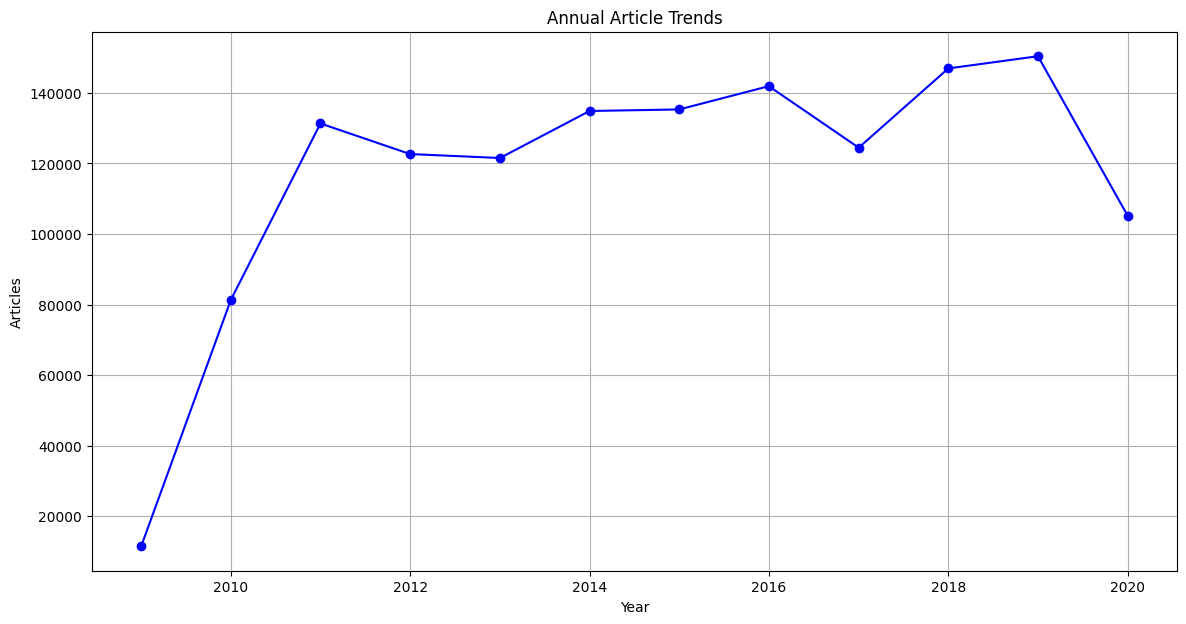

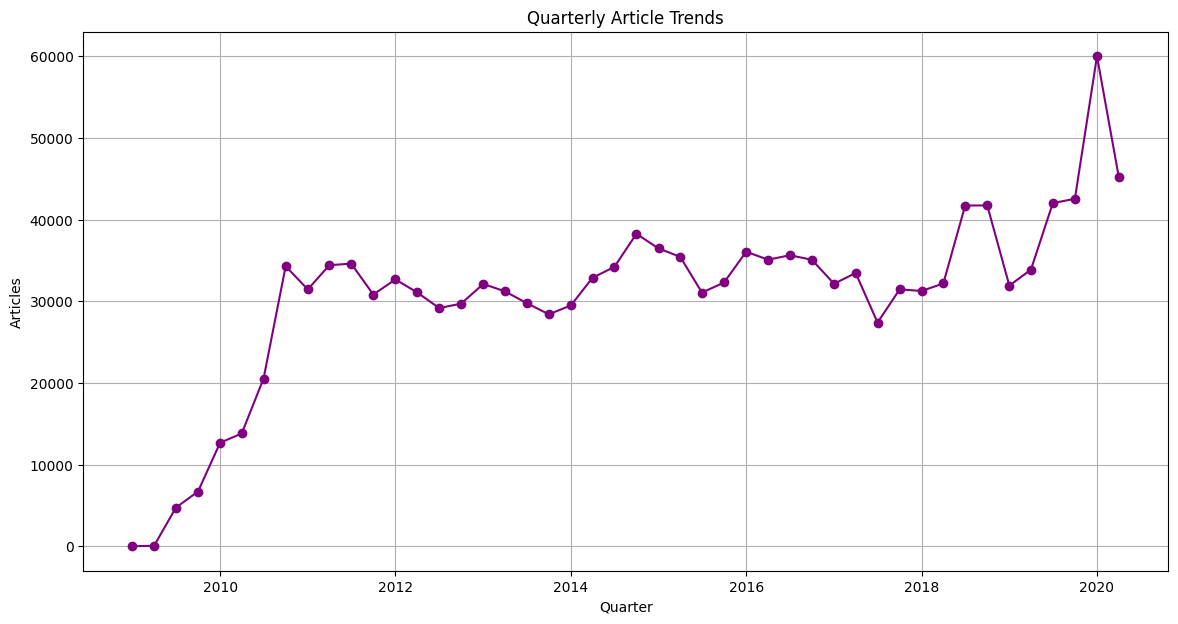

In [16]:
# Analyze annual and quarterly trends
from publicationAnalysis import *

annual_counts = analyze_annual_trends(df)
quarterly_counts = analyze_quarterly_trends(df)

# Plot the long-term trends
plot_long_term_trends(annual_counts, quarterly_counts)

#### Decomposition

In [17]:
# Decompose the time series to understand trends and seasonality
import statsmodels.api as sm

decomposed = sm.tsa.seasonal_decompose(annual_counts['no_of_articles'], model='additive', period=6)

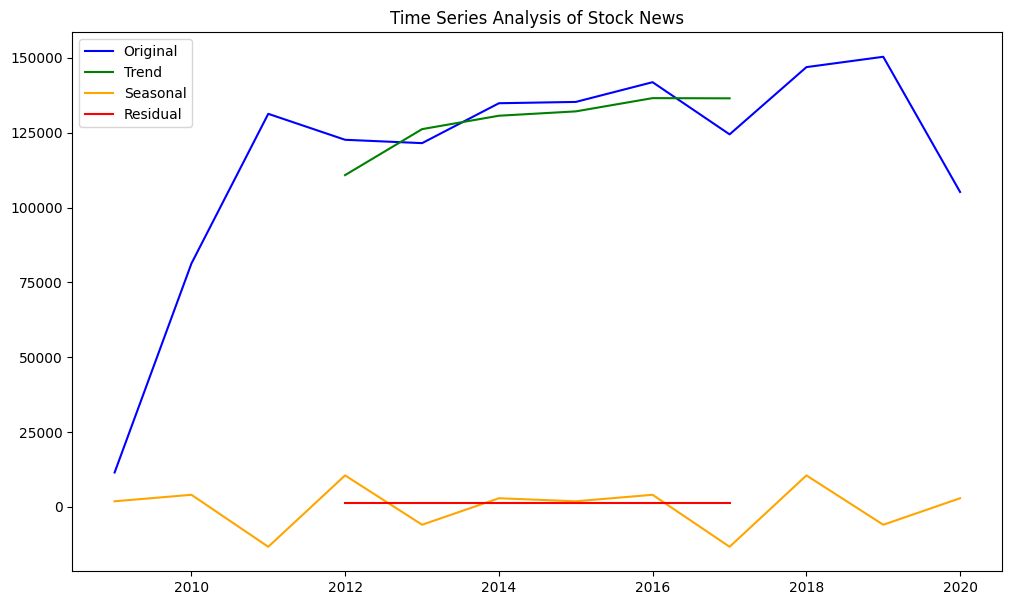

In [21]:
plt.figure(figsize=(12, 7))

# plot the original data
plt.plot(annual_counts['date'], annual_counts['no_of_articles'], label='Original', color='blue')

# plot the trend
plt.plot(annual_counts['date'], decomposed.trend, label='Trend', color='green')

# plot the seasonal
plt.plot(annual_counts['date'], decomposed.seasonal, label='Seasonal', color='orange')

# plot residual
plt.plot(annual_counts['date'], decomposed.resid, label='Residual', color='red')

plt.title('Time Series Analysis of Stock News')
plt.legend()
plt.show()


##### Summary of Time Series Decomposition

+ Trend: A steady upward trajectory indicates a growing volume or impact of stock news over time.
+ Seasonality: Minimal recurring patterns suggest no significant seasonal influences.
+ Residual: Variations close to zero imply random, unpredictable fluctuations.

Overall, the growth in stock news is driven by a long-term trend, with no strong seasonal patterns and residual variations due to random noise.